<a href="https://colab.research.google.com/github/AIcaspianc/AIcaspianc/blob/main/PYF_Project_LearnerNotebook_FullCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Python Foundations: FoodHub Data Analysis



### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [4]:
# Check the shape of the dataset
print("Number of raws and columns are ", df.shape)

Number of raws and columns are  (1898, 9)


#### Observations:
There are 1898 rows and 9 columns present in the dataframe.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [5]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
There are 3 different datatypes present in the dataset: int, float and object
- order_id, customer_id, food_preparation_time and delivery_time are integers (int64)
- cost_of_the_order is float (float64)
- resturant_name, cuisine_type, day_of_the_week and rating are objects (object)

In summary, the dataset includes 5 numerical columns and 4 object columns.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [6]:
# # Checking for missing values in the data and to print the sum of null values for each column
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
There are no missing values in the data. Although there are some 'Not given' exists in the 'rating', they are not blank and they are assigned with a value.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [7]:
# Get the summary statistics of the numerical data and to print the statitical summary of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations:
Food preparation times
- Minimum: 20
- Average: 27.37
- Maximum: 35


### **Question 5:** How many orders are not rated? [1 mark]

In [8]:
# Check the counts of each ratings including the 'Not given'
print(df['rating'].value_counts())

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64


#### Observations:
There are 736 orders that are not rated and assigned with 'Not given'.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [9]:
#Checking number of unique values for each column
print("Number of unique orders is ", df['order_id'].nunique())
print("Number of unique customers is ", df['customer_id'].nunique())
print("Number of unique restaurants is ", df['restaurant_name'].nunique())
print("Number of unique cuisine type is ", df['cuisine_type'].nunique())
print("Number of unique day of the week is ", df['day_of_the_week'].nunique())
print("Number of unique ratings is ", df['rating'].nunique())

Number of unique orders is  1898
Number of unique customers is  1200
Number of unique restaurants is  178
Number of unique cuisine type is  14
Number of unique day of the week is  2
Number of unique ratings is  4


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


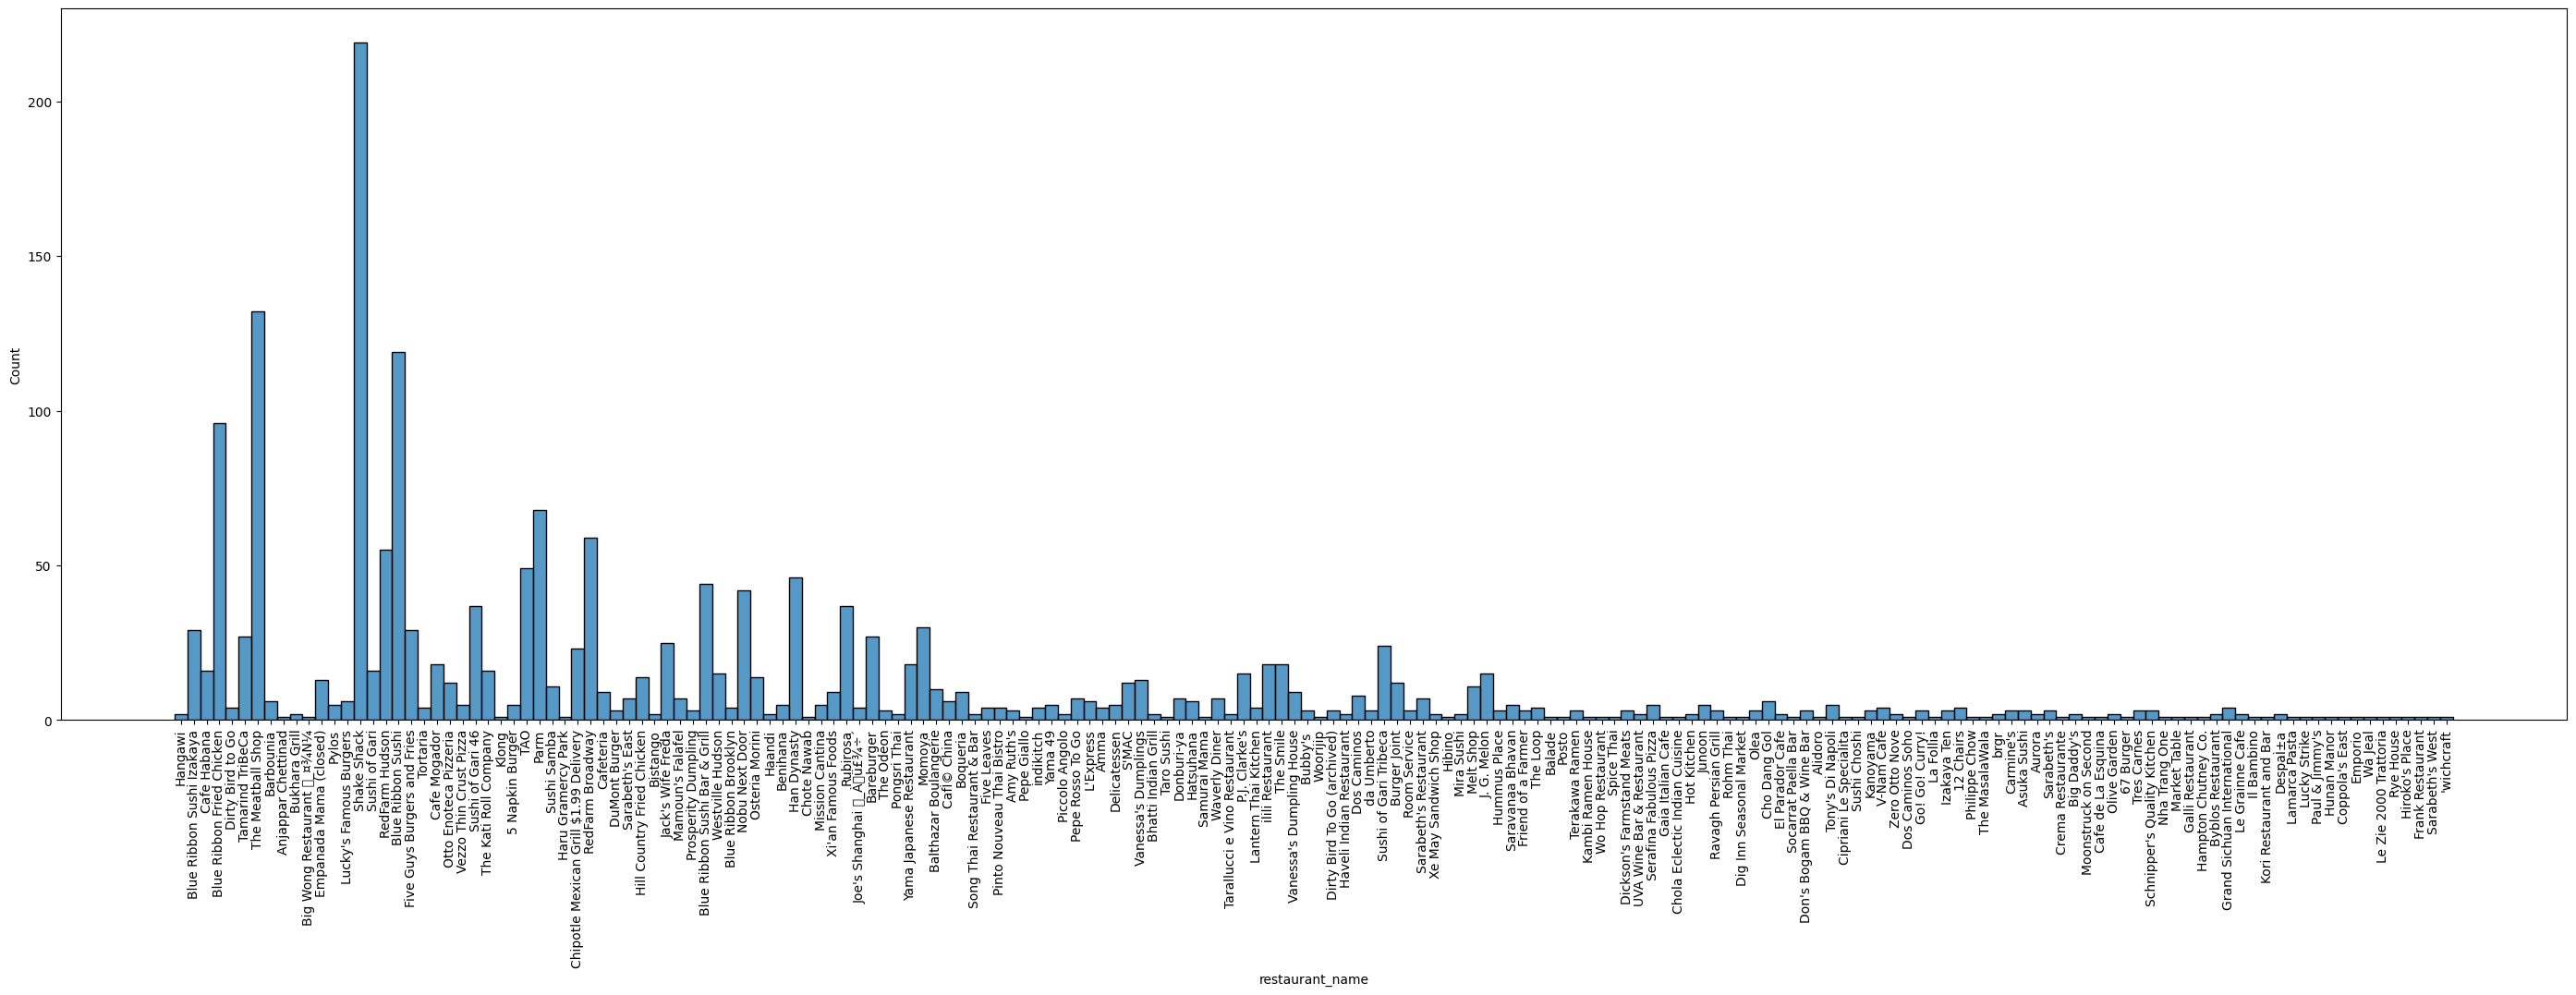

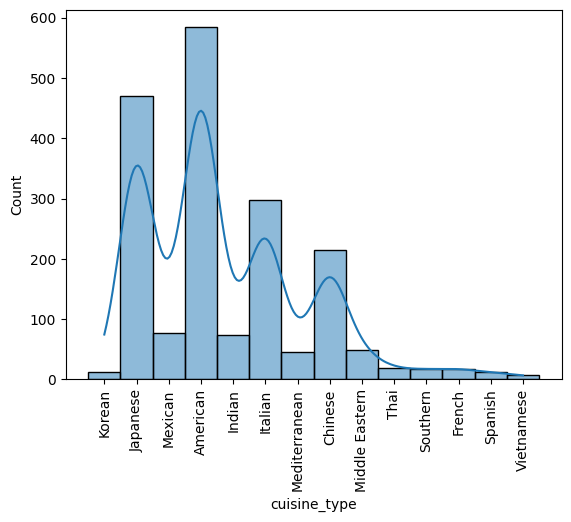

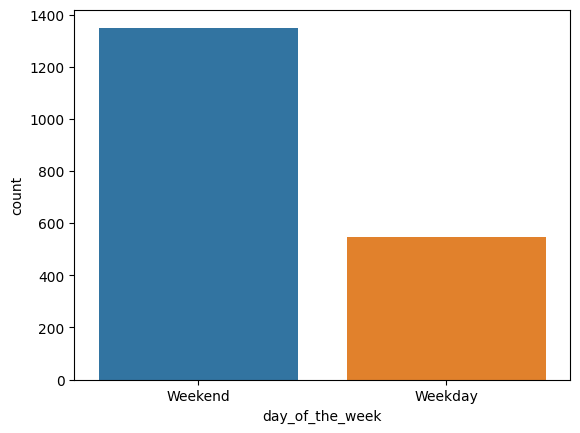

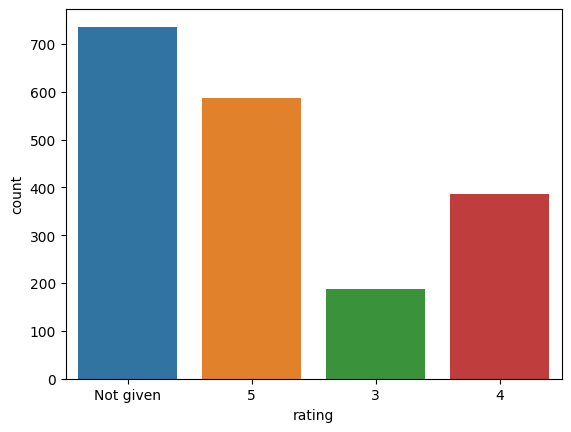

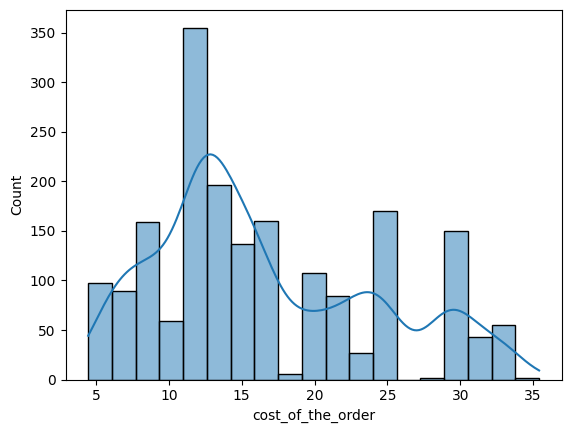

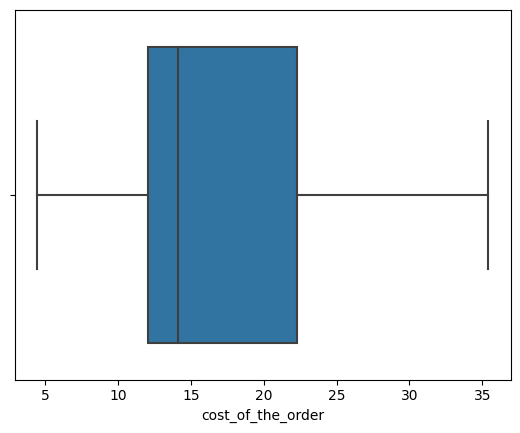

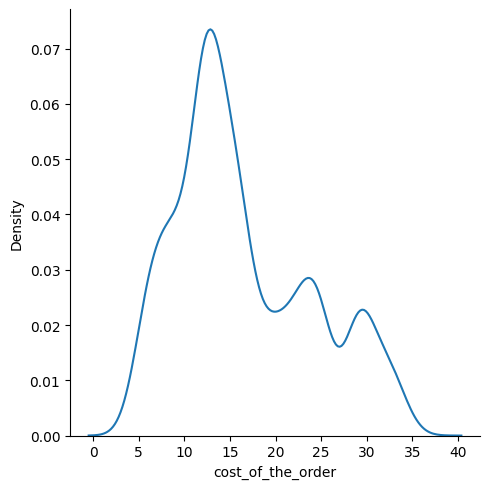

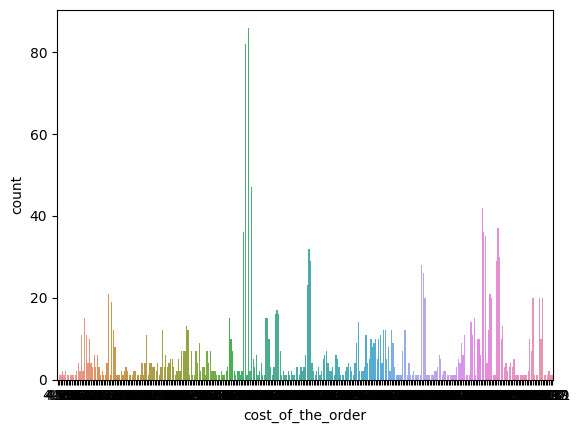

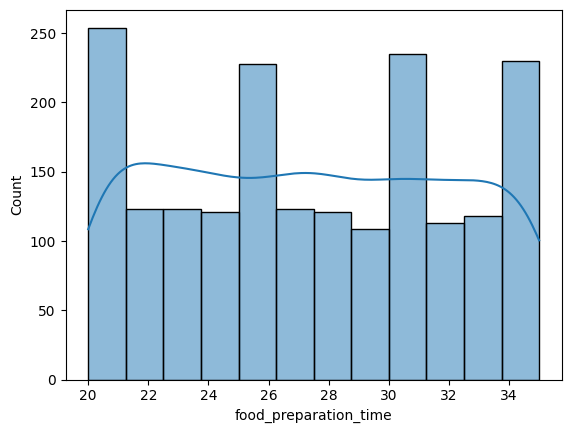

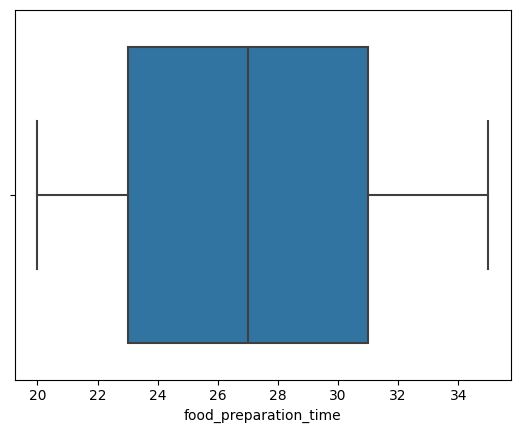

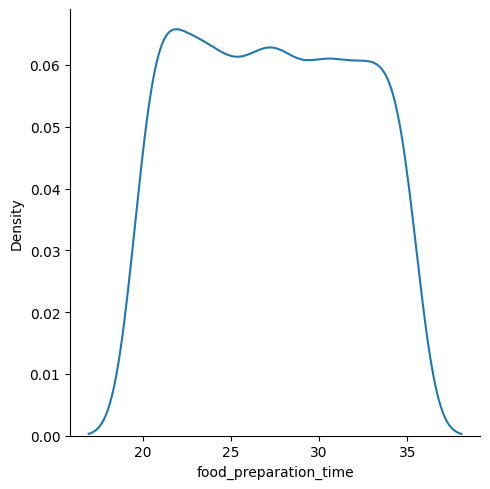

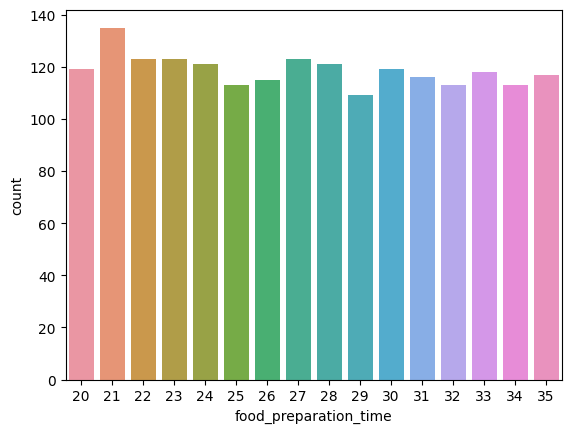

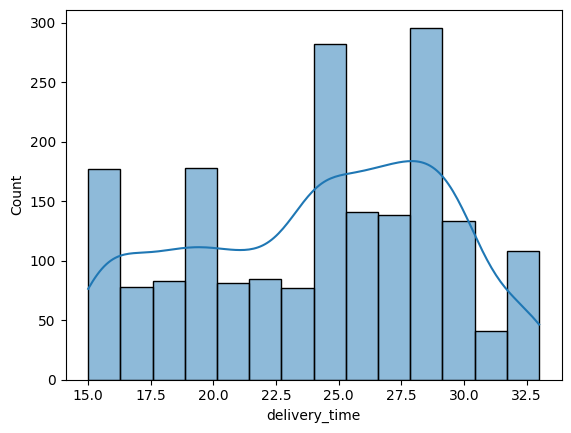

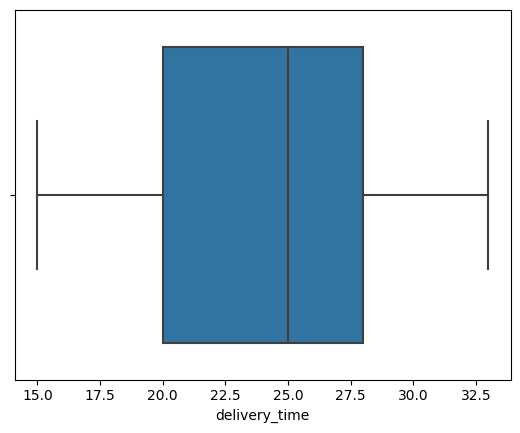

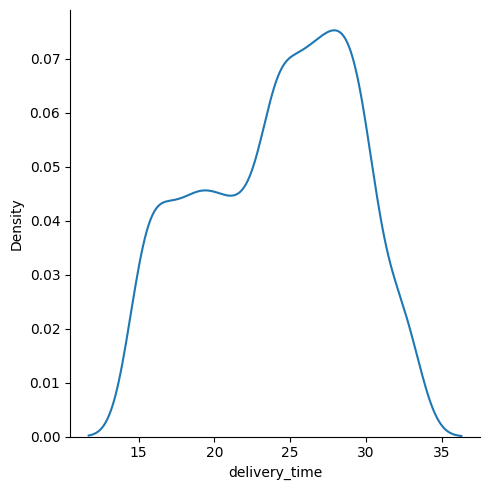

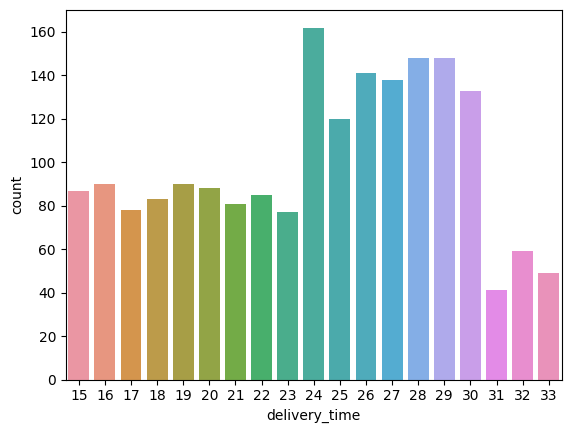

In [10]:
# Check the number of orders for each restaurant
plt.figure(figsize=(35,10))
sns.histplot(df,x='restaurant_name')
plt.xticks(rotation=90)
plt.show()

# Check the number of orders for each cuisine type
sns.histplot(df,x='cuisine_type',kde=True)
plt.xticks(rotation=90)
plt.show()

# Check the ratings based on the day_of_the_week
cat_cols = ['day_of_the_week','rating']
for column in cat_cols:
 sns.countplot(df,x=column)
 plt.show()

# Check the number of orders based on cost of the order, food preparation time and delivery time
cat_cols = ['cost_of_the_order','food_preparation_time','delivery_time']
for column in cat_cols:
 sns.histplot(df,x=column,kde=True)
 plt.show()
 sns.boxplot(df,x=column)
 plt.show()
 sns.displot(df,x=column,kind='kde')
 plt.show()
 sns.countplot(df,x=column)
 plt.show()


#### Observations:
- Number of unique orders is  1898
- Number of unique customers is  1200
- Number of unique restaurants is  178
- Number of unique cuisine type is  14
- Number of unique day of the week is  2
- Number of unique ratings is  4

1. Shake Shack restaurant has highest number of orders.
2. American cuisine is the most ordered cuisine among others.
3. Number of orders in weekends is more than double of those in weekdays.
4. 'Not given' rating is the highest among other ratings.
5. Orders cost in average about 16 dollars.
6. Food preparation takes in average about 27 minutes.
7. Delivery takes in average about 24 minutes.
8. Cost of the order is right skewed meaning that median is smaller than mean.
9. Delivery time is left skewed meaning that median is greater than mean.
10. More than 50% of foods cost less than $15.




### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [11]:
# Check the top 5 restaurants with highest number of orders
print(df['restaurant_name'].value_counts().head(5))

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64


#### Observations:
As can be seen above, following restaurants are top 5 in the number of orders received
- Shake Shack                  
- The Meatball Shop            
- Blue Ribbon Sushi            
- Blue Ribbon Fried Chicken    
- Parm

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [12]:
# Check the most popular cuisine in weekends based on the cost of the order
df.groupby(['day_of_the_week','cuisine_type'])['cost_of_the_order'].sum()

day_of_the_week  cuisine_type  
Weekday          American          2587.11
                 Chinese            891.68
                 French             104.33
                 Indian             411.90
                 Italian           1537.00
                 Japanese          2209.69
                 Korean              24.36
                 Mediterranean      196.56
                 Mexican            397.34
                 Middle Eastern     337.16
                 Southern           115.36
                 Spanish             12.13
                 Thai                61.85
                 Vietnamese          35.75
Weekend          American          6943.67
                 Chinese           2613.94
                 French             251.96
                 Indian             823.24
                 Italian           3355.77
                 Japanese          5453.44
                 Korean             157.66
                 Mediterranean      515.28
                 Mexic

In [13]:
# Check the most popular cuisine in weekends based on the number of orders
df.groupby(['day_of_the_week','cuisine_type'])['order_id'].count()

day_of_the_week  cuisine_type  
Weekday          American          169
                 Chinese            52
                 French              5
                 Indian             24
                 Italian            91
                 Japanese          135
                 Korean              2
                 Mediterranean      14
                 Mexican            24
                 Middle Eastern     17
                 Southern            6
                 Spanish             1
                 Thai                4
                 Vietnamese          3
Weekend          American          415
                 Chinese           163
                 French             13
                 Indian             49
                 Italian           207
                 Japanese          335
                 Korean             11
                 Mediterranean      32
                 Mexican            53
                 Middle Eastern     32
                 Southern       

#### Observations:
The most popular cuisine on the weekends based on the number of orders and also revenue is 'American' by far.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [14]:
# Calculate percentage of orders that cost more than 20 dollars in the dataset
df[df['cost_of_the_order']>20].shape[0]/df.shape[0]*100

29.24130663856691

#### Observations:
About 29 percent of orders cost more than 20 dollars.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [15]:
# Check the mean delivery time
df.describe().T
df['delivery_time'].mean()

24.161749209694417

#### Observations:
The mean order delivery time is about 24 minutes.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [16]:
# Check counts of each customer_id to get the top 3 most frequent customers
df['customer_id'].value_counts().head(3)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations:
The following customer IDs are the top 3 most frequent customers.
- 52832
- 47440
- 83287

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


<ipython-input-17-741aef35031a>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)


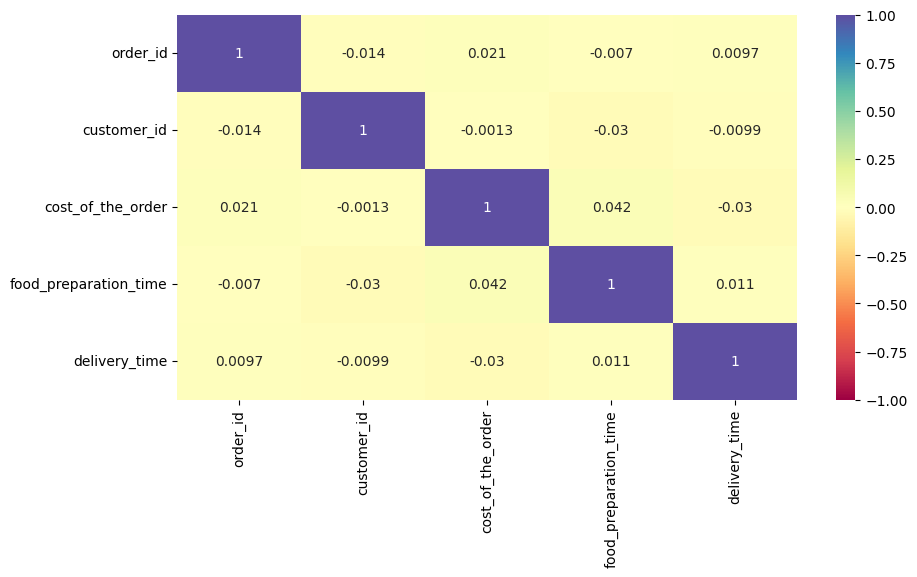

In [17]:
# Check the heatmap and correlation between the customer Id, cost of order, food preparation time and delivery time
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

#### Observations:
There are no strong correlation between number of orders, number of customers, cost of the order, food preparation time and delivery time.

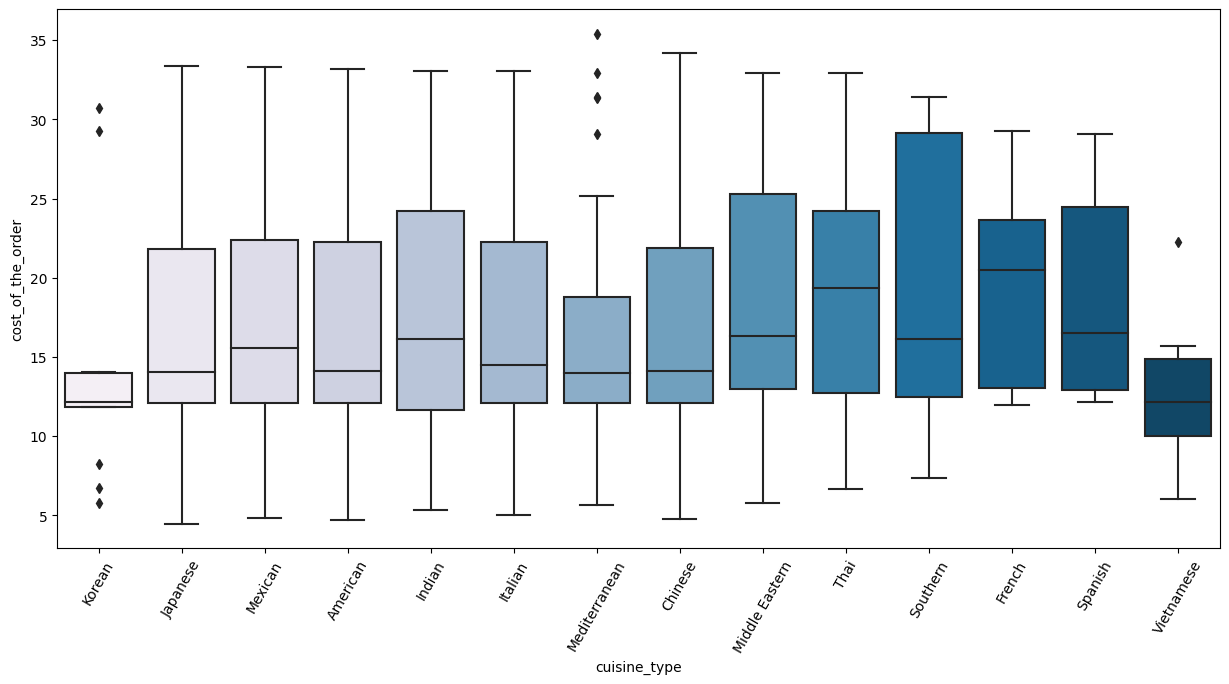

In [18]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.show()

#### Observations:
- Cost of the order vary considerably for each cuisine type.
- Korean, Mediterranean and Vietnamese cuisine have some outliers for the cost of the orders.
- Chienese has the biggest range of prices.
- French cuisine has the highest mean costs compared to the other cuisines.


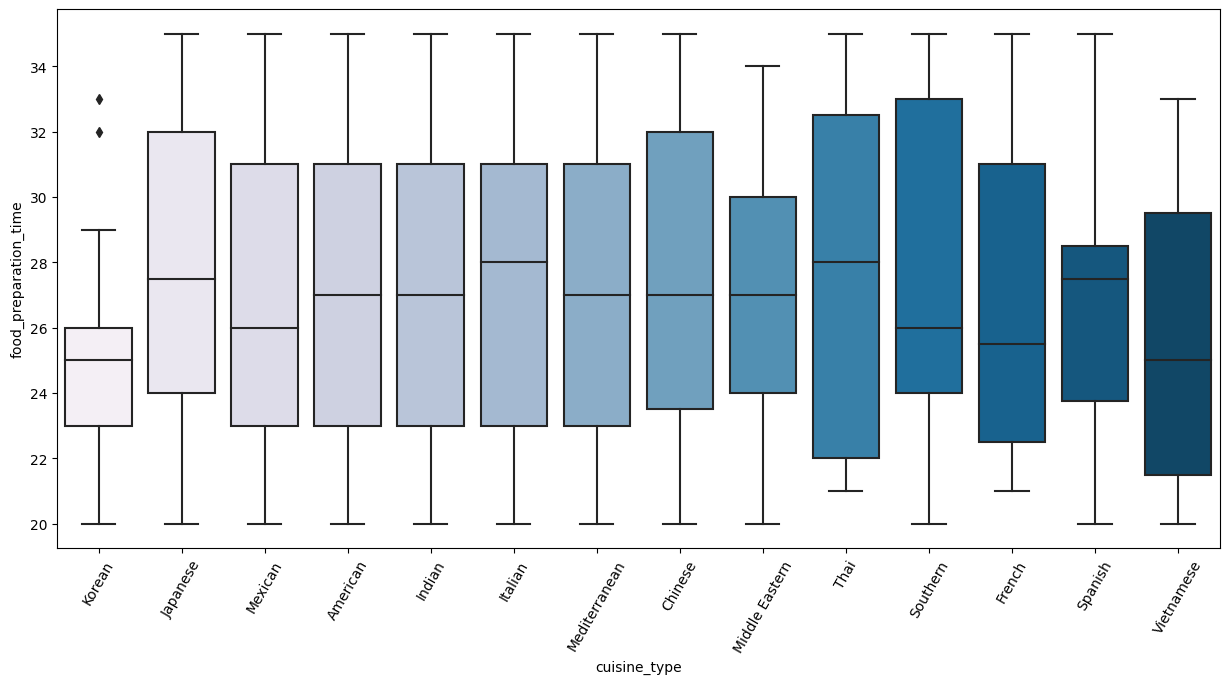

In [19]:
# Relationship between food preparation time and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = df, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.show()

#### Observations:
- Food prepapration time vary considerably for each cuisine type.
- Korean orders have two outliers that shows taking unusual time to be prepared.
- Minimum preparation time among all cuisine types is 20 minutes.

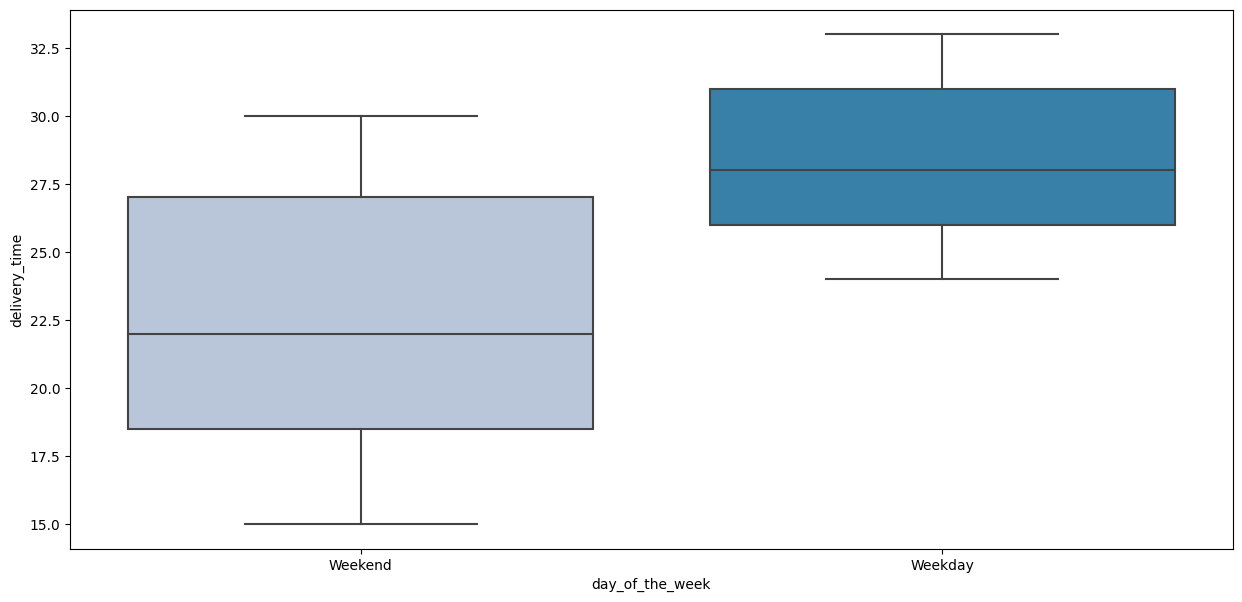

In [20]:
# Relationship between day of the week and delivery time
plt.figure(figsize=(15,7))
sns.boxplot(x = "day_of_the_week", y = "delivery_time", data = df, palette = 'PuBu')
plt.show()

#### Observations:
- Delivery time is mainly faster in the weekends compared to the weekdays.

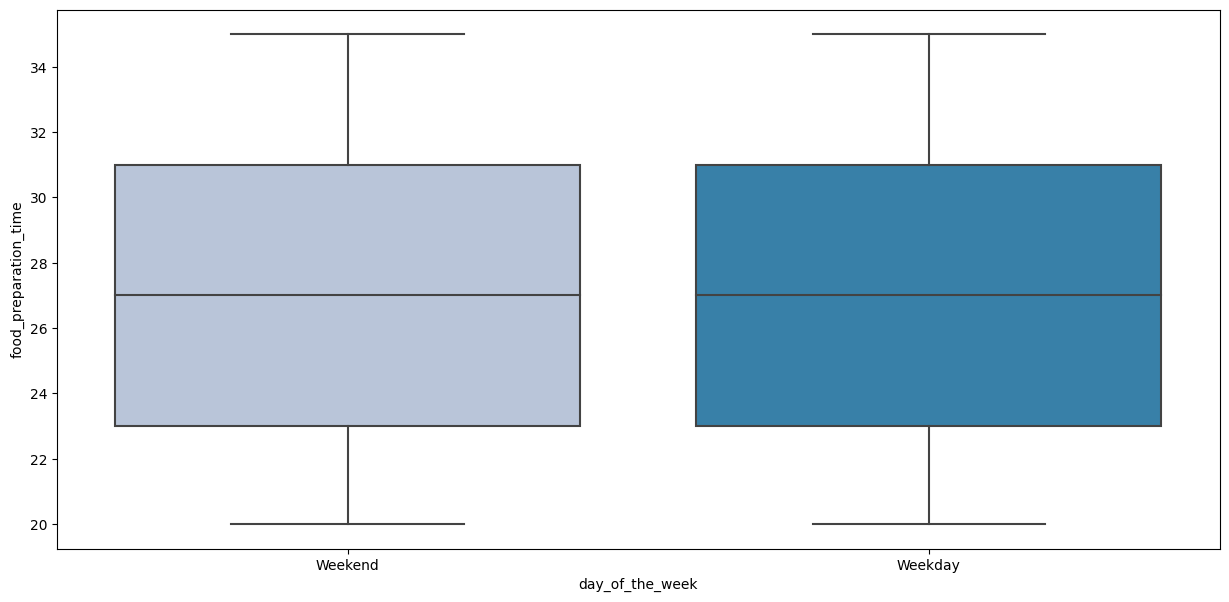

In [21]:
# Relationship between day of the week and delivery time
plt.figure(figsize=(15,7))
sns.boxplot(x = "day_of_the_week", y = "food_preparation_time", data = df, palette = 'PuBu')
plt.show()

#### Observations:
Food preparation time is not correlated with day of the week.

In [22]:
# Get the restuarant names with highest order revenue
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)

restaurant_name
Shake Shack                      3579.53
The Meatball Shop                2145.21
Blue Ribbon Sushi                1903.95
Blue Ribbon Fried Chicken        1662.29
Parm                             1112.76
RedFarm Broadway                  965.13
RedFarm Hudson                    921.21
TAO                               834.50
Han Dynasty                       755.29
Blue Ribbon Sushi Bar & Grill     666.62
Rubirosa                          660.45
Sushi of Gari 46                  640.87
Nobu Next Door                    623.67
Five Guys Burgers and Fries       506.47
Name: cost_of_the_order, dtype: float64

#### Observations:
Shake Shack restaurant has largest revenue compared to other restaurants.

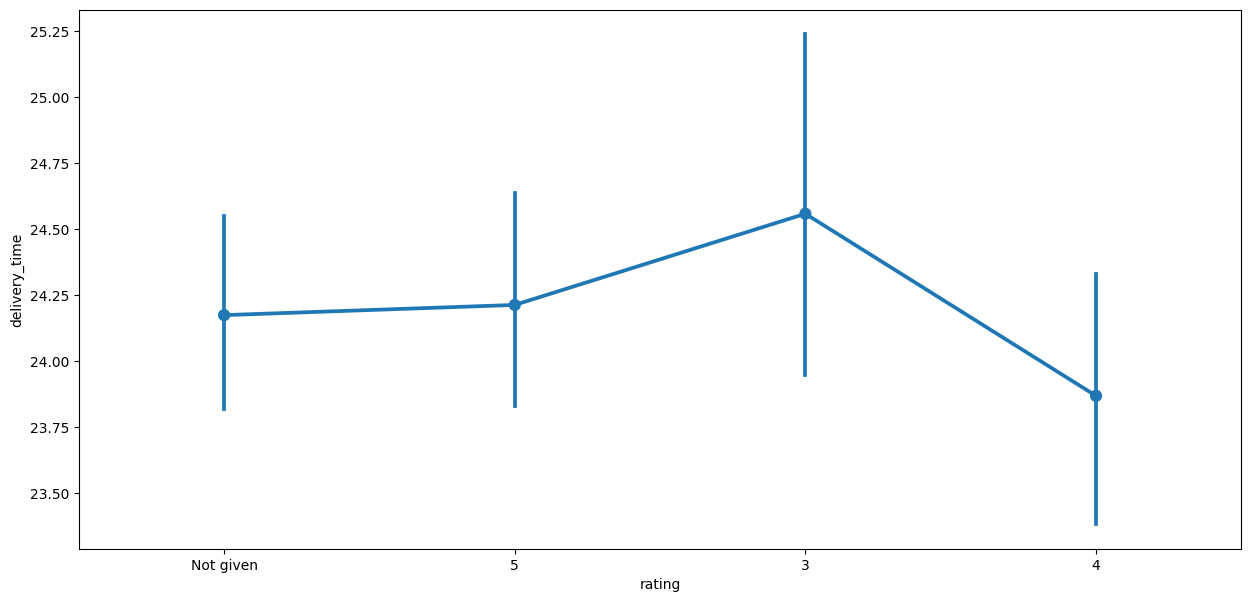

In [23]:
# Relationship between rating and delivery time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()

#### Observations:
Larger delivery times leads mainly to lower ratings.

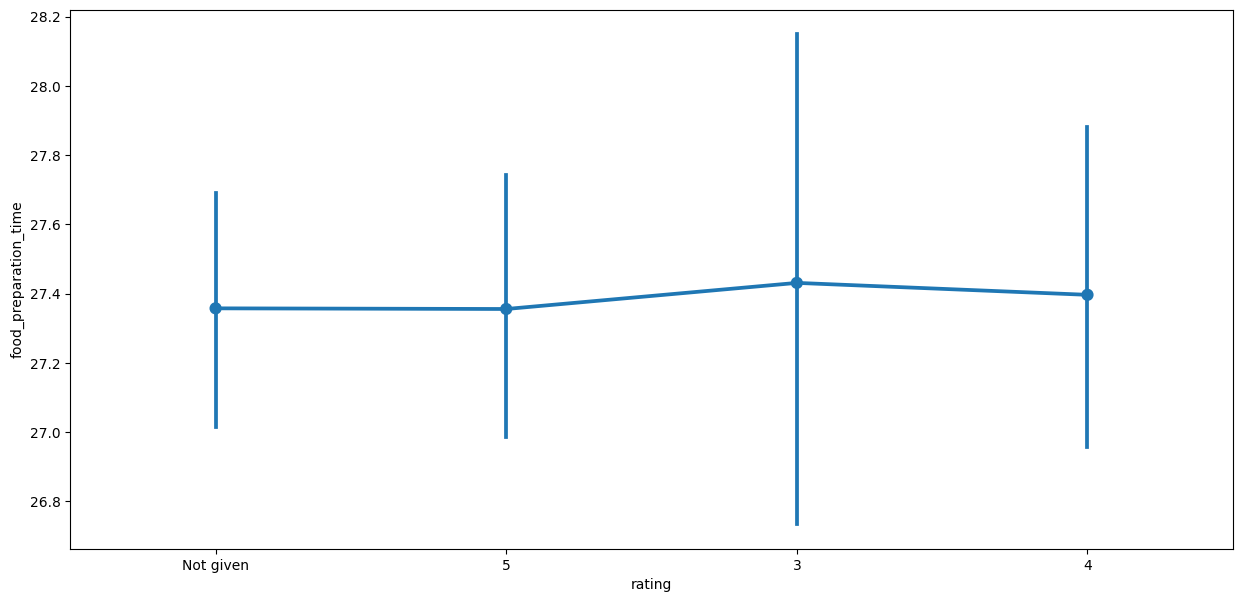

In [24]:
# Relationship between rating and food preparation time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'food_preparation_time', data = df)
plt.show()

#### Observations:
Food preparation times of above ~28 minuted leads to lower ratings of 3.

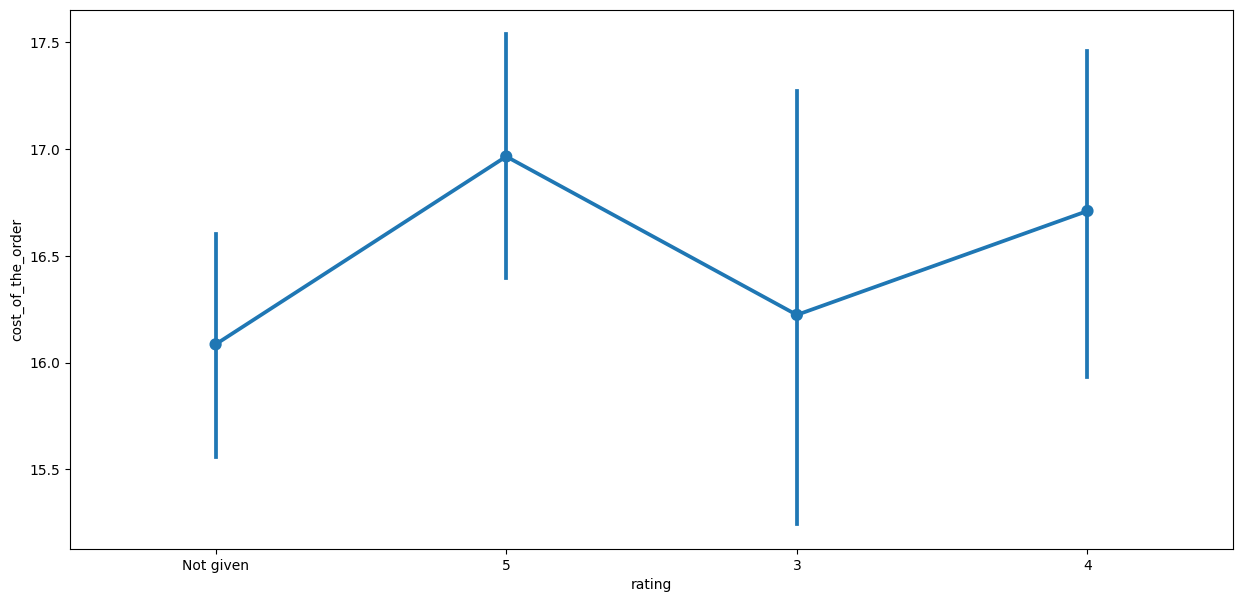

In [25]:
# Relationship between rating and cost of the order
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'cost_of_the_order', data = df)   ## Complete the code to visualize the relationship between rating and cost of the order using pointplot
plt.show()

#### Observations:
Low cost foods leads mainly to lower ratings.

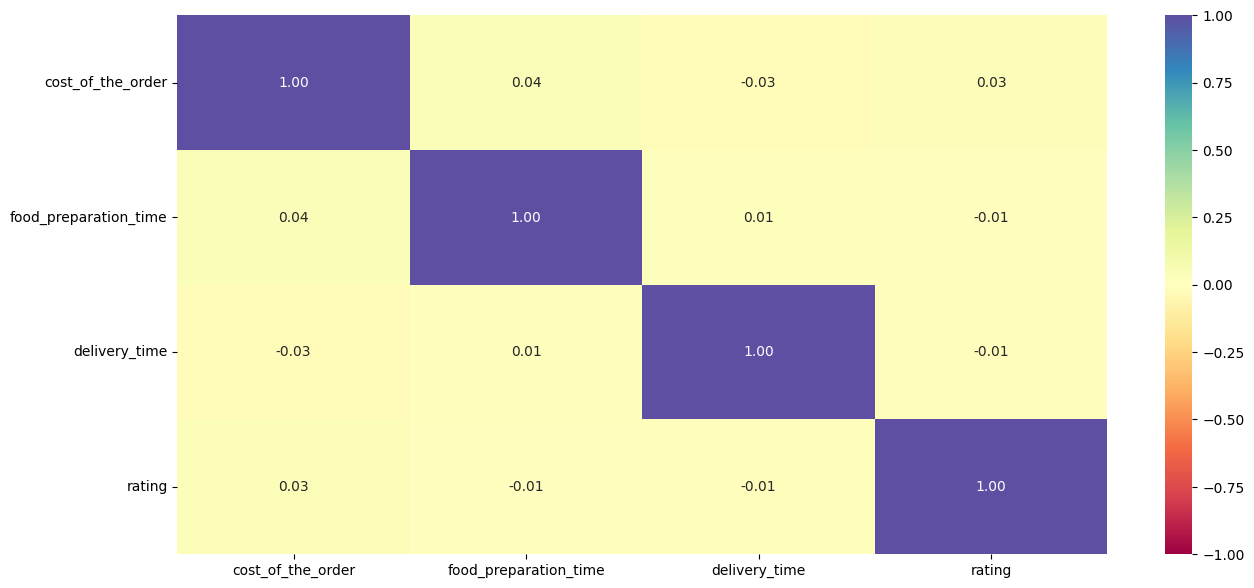

In [26]:
# Plot the heatmap for cost of the order, food preparation time, delivery time and rating to find a possible correlation between them
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time','rating']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1162 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 133.6+ KB


#### Observations:
There is no strong correlation between cost of the order, food preparation time,delivery time and cost of the order.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [28]:
# Filter the rated restaurants
df_rated = df.dropna(subset=['rating'])

# Create a dataframe that contains the restaurant names with their rating counts
df_ratcount = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending=False).reset_index()

# Get the restaurant names that have rating count more than 50
df_ratcount50 = df_ratcount.loc[df_ratcount['rating']>50]['restaurant_name']

# Group the restaurant names with their ratings and find the mean rating of each restaurant
df_ave = df_rated.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending=False).reset_index()

# Get the restaurant names that have rating more than 4
df_ave4 = df_ave.loc[df_ave['rating']>4]['restaurant_name']

# Get the restaurant names that have rating count more than 50 and have rating more than 4
df_ave4[df_ave4.isin(df_ratcount50)].sort_values(ascending = False).reset_index().dropna()



,index,restaurant_name
0,66,The Meatball Shop
1,93,Shake Shack
2,101,Blue Ribbon Sushi
3,89,Blue Ribbon Fried Chicken


#### Observations:
The following 4 restaurants have more than 50 ratings with the average rating of greater than 4.
- The Meatball Shop
- Shake Shack
- Blue Ribbon Sushi
- Blue Ribbon Fried Chicken

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [29]:
# A For loop to determine the commission revenue
print('Total revenue before commissions:', df['cost_of_the_order'].sum())
df['cost_of_the_order_commission']=df['cost_of_the_order'].copy()
j=0
for i in df['cost_of_the_order']:
  if i>20:
     commission=0.25*i
  elif 5<i<=20:
     commission=0.15*i
  else:
     commission=0*i
  df['cost_of_the_order_commission'][j]=commission
  j=j+1

print('Total revenue for the commissions:', df['cost_of_the_order_commission'].sum())

Total revenue before commissions: 31314.82


<ipython-input-29-e8d8bd0383ab>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cost_of_the_order_commission'][j]=commission


Total revenue for the commissions: 6166.303


#### Observations:
The total revenue before commissions is 31314.82. The total commissions revenue is 6166.303.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [30]:
# Calculate total delivery time and add a new column to the dataframe df to store the total delivery time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# Calculate the percentage of orders that have more than 60 minutes of total delivery time (see Question 9 for reference)
df.loc[df['total_time']>60].shape[0]/df.shape[0]*100

10.537407797681771

#### Observations:
10.53 percent of orders take more than 60 minutes to get delivered from the time the order is placed.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [31]:
# Get the mean delivery time on weekdays and weekends
df_mean_weekday = df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()
df_mean_weekend = df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()
print('mean delivery time during weekdays is ', df_mean_weekday)
print('mean delivery time during weekends is ', df_mean_weekend)

mean delivery time during weekdays is  28.340036563071298
mean delivery time during weekends is  22.4700222057735


#### Observations:
Mean delivery time vary during weekdays is about 28 while the mean delivery time during weekends is about 22. So orders are delivered faster in the weekends.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

In [32]:
# Calculating total revenue and foodhub revenue for each cuisine type
cuisine_info = df.groupby('cuisine_type')['rating'].agg(['count','mean'])
cuisine_info ['revenue'] = df.groupby('cuisine_type')['cost_of_the_order'].sum()
def foodhub_revenue(x):
    if x>20:
      return x*0.25
    elif 5<x<=20:
      return x*0.15
    else:
      return x*0
df['foodhub_revenue_over20'] = df[df['cost_of_the_order']>20]['cost_of_the_order'].apply(foodhub_revenue)
df['foodhub_revenue_under20'] = df[df['cost_of_the_order']<=20]['cost_of_the_order'].apply(foodhub_revenue)
df['foodhub_revenue'] = df['cost_of_the_order'].apply(foodhub_revenue)
cuisine_info ['foodhub_revenue_over20']= df.groupby('cuisine_type')['foodhub_revenue_over20'].sum()
cuisine_info ['foodhub_revenue_under20']= df.groupby('cuisine_type')['foodhub_revenue_under20'].sum()
cuisine_info ['foodhub_revenue']= df.groupby('cuisine_type')['foodhub_revenue'].sum()
cuisine_info ['foodhub_revenue_per_order']= cuisine_info['foodhub_revenue']/cuisine_info['count']
print("Total Foodhub revenue is ", cuisine_info['foodhub_revenue'].sum())
print("Total Foodhub revenue for orders above 20 is ", cuisine_info['foodhub_revenue_over20'].sum(),"which is ", cuisine_info['foodhub_revenue_over20'].sum()/cuisine_info['foodhub_revenue'].sum()*100 ," percent of total revenue")
print("Total Foodhub revenue for orders under 20 is ", cuisine_info['foodhub_revenue_under20'].sum(),"which is ", cuisine_info['foodhub_revenue_under20'].sum()/cuisine_info['foodhub_revenue'].sum()*100  ," percent of total revenue")
cuisine_info

Total Foodhub revenue is  6166.303
Total Foodhub revenue for orders above 20 is  3688.7275000000004 which is  59.82073050902624  percent of total revenue
Total Foodhub revenue for orders under 20 is  2477.575500000001 which is  40.17926949097378  percent of total revenue


,count,mean,revenue,foodhub_revenue_over20,foodhub_revenue_under20,foodhub_revenue,foodhub_revenue_per_order
cuisine_type,,,,,,,
American,368,4.298913,9530.78,1126.9900,751.2840,1878.2740,5.104005
Chinese,133,4.338346,3505.62,412.2750,277.7655,690.0405,5.188274
French,10,4.300000,356.29,56.8725,19.3200,76.1925,7.619250
Indian,50,4.540000,1235.14,154.3075,92.6865,246.9940,4.939880
Italian,172,4.360465,4892.77,582.4225,384.4620,966.8845,5.621422
Japanese,273,4.373626,7663.13,829.0175,649.2270,1478.2445,5.414815
Korean,9,4.111111,182.02,15.0000,18.3030,33.3030,3.700333
Mediterranean,32,4.218750,711.84,73.8800,62.4480,136.3280,4.260250
Mexican,48,4.416667,1303.85,154.6075,102.0855,256.6930,5.347771


The food aggregator company has collected the data of 1898 orders made by registered customers in their online portal. I analysed the data here to get a fair idea about the demand of different restaurants in order to make recommendations to enhance their customer experience.
### Conclusions:
1.	Certain cuisines are more popular than others. The most popular cuisines are American, Italian and Japanese. American is the most popular cuisine for both weekends and weekdays.
2.	Certain restaurants have got highest number of ratings and higher average of ratings. These restaurants are The Meatball Shop, Shake Shack, Blue Ribbon Sushi, Blue Ribbon Fried Chicken.
3.  The most popular restaurants only offer the most popular cuisines.
4.	There are a greater number of orders in weekends compared to weekdays.
5.	Food preparation time is nearly equal in the weekdays and in the weekends however delivery times are longer during weekdays compared to weekends.
6.	Longer delivery time and food preparation time lead to lower rating.
7.	The higher ratings were given to the more expensive cuisines. Low-cost food usually leads to lower ratings.
8. Foodhub generates more revenue per order for French, Spanish and Thai cuisines.
9. Foodhub receives about 60% of revenue from orders above 20 and the rest from orders under 20.
10. American generates the highest revenue for the foodhub while Spanish obtains the highest rating.

### Recommendations:

1.	Restaurants try to offer the most popular cuisines namely American, Italian and Japanese that usually lead to the largest number of orders with higher ratings.
2.	Restaurants try to avoid focusing on low-cost foods as they usually tend to receive lower ratings.
3.	Restaurants try to reduce the delivery times during weekdays which will lead to higher ratings.
4.	Restaurants try to reduce the food preparation times which will leads to higher ratings.
5.  Market expansion on orders above 20 dollar is a great strategy to increase the revenue and rating simultaneously.
6. French, spanish and Thai cuisines have a great potential and should be considered in the future business strategy.

---